# Probability Distributions Assignment

In [202]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

1. A typist makes on average 2 mistakes per page. What is the probability of a particular page having no errors on it?

This problem relates to a Poisson distribution given that we have a fixed rate for the mistakes. Therefore lambda = 2 and X = 0.

We know that the rate of the typos is 2 per page, therefore lambda equals 2. Now we want to find the probability to fin 0 typos in one page. We do this using the Poisson probability mass function.

In [19]:
print('P(X = 0) = ',round(stats.poisson.pmf(0,2)*100,1))

P(X = 0) =  13.5


2. Components are packed in boxes of 20. The probability of any individual component being defective is 0.1. What is the probability of a box containing exactly 2 defective components?

This is the case of binomial distribution. The type of data is discrete and we're given the probability of 20 choose 1.

We use the binomial distribution to answer this question.

In [53]:
dist = stats.binom(20, 0.1)
print('P(X = 2) = ', round(dist.pmf(2)*100,1))

P(X = 2) =  28.5


3. Components are packed in boxes of 20. The probability of any individual component being defective is 0.1. What is the probability of a box containing AT MOST 2 defective components?

In this case we're not asked to find the probability of a given value but the cummlative probability at X = 2.

In [77]:
dist = stats.binom(n=20,p= 0.1)
print('P(X <= 2) = ', round(dist.cdf(2)*100,1))

P(X <= 2) =  67.7


4. Patrons arrive at a local bar at a rate of 30 per hour. What is the probability that the bouncer can take a three minute bathroom break without missing the next patron?

This case follows a Poisson distirbution with lambda = 1/2 shot per minute. Therefore we need to determine when X = 3.

In [89]:
print('P(X = 0) = ',round(stats.poisson.pmf(3,0.5)*100,1))

P(X = 0) =  1.3


0.03125

## Part 2

In [178]:

def prof_sample():
    
    nview_dist = stats.uniform(5000,1000)
    con_dist = stats.binom(nview_dist.rvs(1),0.12)
    wholesale_dist = stats.binom(con_dist.rvs(1),0.2)
    nonwhole_dist = stats.binom(con_dist.rvs(1),0.8)
    
    profit = con_dist.rvs(1)*(wholesale_dist.rvs(1)/con_dist.rvs(1)*50 + nonwhole_dist.rvs(1)/con_dist.rvs(1)*60)
    
    return profit


In [196]:
result = np.empty([10000,1])

for i in range(10000):
    
    result[i,0] = prof_sample()[0]

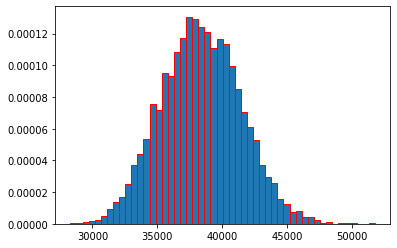

In [224]:
plt.hist(result, bins=50, edgecolor='red', density = True);

In [233]:
np.mean(result)
midd_95 = np.array([np.mean(result)-2*np.std(result),np.mean(result)+2*np.std(result)])
midd_95

array([32253.60529433, 44414.34489924])